In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

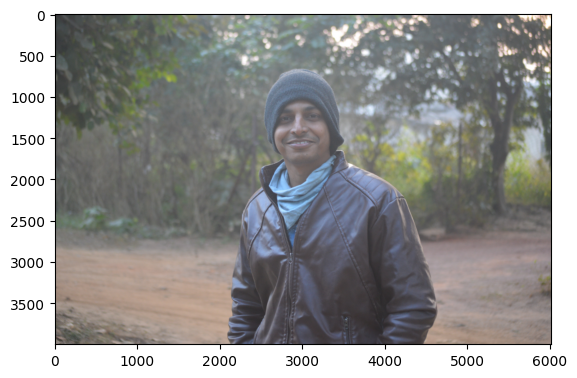

In [2]:
image1 = Image.open("/Users/arihant/Desktop/Py/pishu/duplicate/content/101D3200/DSC_1683.JPG")
image_array1 = np.array(image1)
plt.imshow(image_array1)

In [3]:
image = face_recognition.load_image_file("/Users/arihant/Desktop/Py/pishu/duplicate/content/101D3200/DSC_1683.JPG")

face_locations = face_recognition.face_locations(image)

In [4]:
face_locations

[(958, 3354, 1757, 2555)]

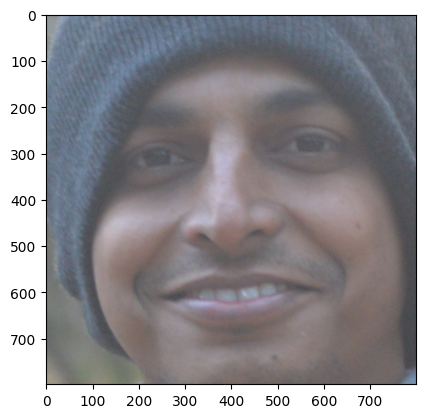

In [5]:
top, right, bottom, left = face_locations[0]
face_image1 = image[top:bottom, left:right]
plt.imshow(face_image1)
image_save = Image.fromarray(face_image1)
image_save.save("image_1.jpg")

In [6]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

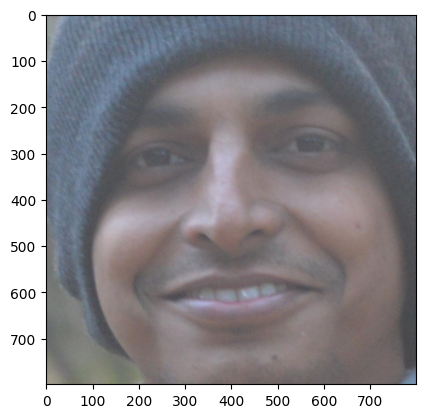

In [7]:
# face_image  = cv2.imread("/Users/arihant/Desktop/Py/pishu/duplicate/content/101D3200/DSC_1683.JPG")
face_image=cv2.imread("image_1.jpg")
plt.imshow(face_image[:, :, : : -1])

In [8]:
print (face_image.shape)

(799, 799, 3)


In [9]:
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [10]:
model = load_model("/Users/arihant/Desktop/Py/pishu/emo/model_v6_23.hdf5")


In [11]:
predicted_class = np.argmax(model.predict(face_image))

1/1 [==============================] - 0s 77ms/step


2023-01-07 01:36:26.474645: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [12]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [13]:
print(predicted_label)


Happy
